In [1]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # supress tensorflow warnings


# import libraries
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# set random seed
random.seed(42)

In [2]:
if 'data_wraper' in sys.modules: del sys.modules['data_wraper']
from data_wraper import *

In [3]:
dataset = Dataset('data\mapsCeline_FOVfitting_2_pol-60.mat')
dataset.add_data('data\mapsCeline_3quadrants_2_pol-60.mat')
dataset.add_data('data\mapsCeline_FOVfitting_3_pol-60.mat')
dataset.add_data('data\mapsCeline_3quadrants_3_pol-60.mat')
dataset.add_data('data\mapsCeline_FOVfitting_4_pol-60.mat')
dataset.add_data('data\mapsCeline_3quadrants_4_pol-60.mat')
""" dataset.add_data('data\mapsCeline_FOVfitting_5_pol-60.mat')
dataset.add_data('data\mapsCeline_3quadrants_5_pol-60.mat')
dataset.add_data('data\mapsCeline_FOVfitting_6_pol-60.mat')
dataset.add_data('data\mapsCeline_3quadrants_6_pol-60.mat')
dataset.add_data('data\mapsCeline_FOVfitting_9_pol-60.mat')
dataset.add_data('data\mapsCeline_3quadrants_9_pol-60.mat') """

" dataset.add_data('data\\mapsCeline_FOVfitting_5_pol-60.mat')\ndataset.add_data('data\\mapsCeline_3quadrants_5_pol-60.mat')\ndataset.add_data('data\\mapsCeline_FOVfitting_6_pol-60.mat')\ndataset.add_data('data\\mapsCeline_3quadrants_6_pol-60.mat')\ndataset.add_data('data\\mapsCeline_FOVfitting_9_pol-60.mat')\ndataset.add_data('data\\mapsCeline_3quadrants_9_pol-60.mat') "

In [4]:
df = dataset.export_dataframe()

In [35]:
# isolate X (Map1, Maps2, Map3) and Y (Combined) while conserving the shape of the data
X = df[['Map1', 'Map2', 'Map3']].to_numpy().tolist()
Y = df[['Combined']].to_numpy().tolist()

In [36]:
X = np.array(X).reshape(len(X), 3, 512, 512)
Y = np.array(Y).reshape(len(Y), 1, 512, 512)

In [37]:
X = tf.convert_to_tensor(X, dtype=tf.float32)
Y = tf.convert_to_tensor(Y, dtype=tf.float32)

In [38]:
X = tf.math.log(tf.math.abs(X))
Y = tf.math.log(tf.math.abs(Y))
# normalize data
X = tf.math.divide(X, tf.math.reduce_max(X))
Y = tf.math.divide(Y, tf.math.reduce_max(Y))

In [39]:
total_samples = X.shape[0]
test_size = 0.2
num_test_samples = tf.cast(tf.round(total_samples * test_size), tf.int32)

shuffle_indices = tf.random.shuffle(tf.range(total_samples))

train_indices = shuffle_indices[num_test_samples:]
test_indices = shuffle_indices[:num_test_samples]

X_train = tf.gather(X, train_indices)
Y_train = tf.gather(Y, train_indices)

X_test = tf.gather(X, test_indices)
Y_test = tf.gather(Y, test_indices)

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

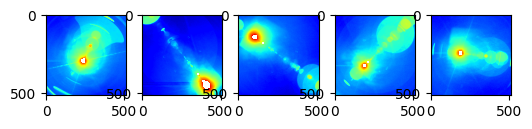

In [41]:
# print some images from the training set
k = 5
fig, ax = plt.subplots(1, 5, figsize=(6,6*k))
for i in range(k):
    ax[i].imshow(X_train[i,2,:,:], cmap='jet')
plt.show()

In [50]:
if 'models' in sys.modules: del sys.modules['models']
from models import *

In [51]:
unet = Unet()
unet.summary(True)

ValueError: Exception encountered when calling layer "max_pooling2d_9" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_9/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,256,128].

Call arguments received by layer "max_pooling2d_9" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 256, 128), dtype=float32)

In [44]:
unet.train(X_train, Y_train, epochs=1, batch_size=64)

ValueError: in user code:

    File "c:\Users\f076048\Documents\Stage_CSL\venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\f076048\Documents\Stage_CSL\venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\f076048\Documents\Stage_CSL\venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\f076048\Documents\Stage_CSL\venv\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\f076048\Documents\Stage_CSL\venv\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\f076048\Documents\Stage_CSL\venv\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(None, 3, 512, 512)
